In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

*** (a) Independent ***
log p(A) = -4.0879
log p(A1)p(A2) = -4.0879
log p(B) = -4.09
log p(B1)p(B2) = -4.0879
*** (b) Correlated ***
log p(A) = -2.1917
log p(A1)p(A2) = -4.0879
log p(B) = -23.51
log p(B1)p(B2) = -4.0879


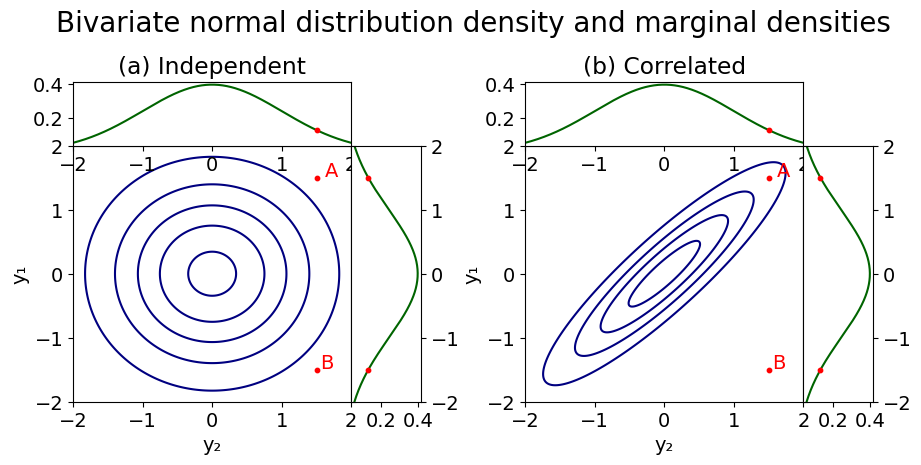

In [2]:
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(nrows=2, ncols=5, width_ratios=(4,1,1.5,4,1), height_ratios=(1,4),
    left=0.1, right=0.9, bottom=0.1, top=0.9,
    wspace=0, hspace=0)

for xoffset, cov, subt in [(0, 0, '(a) Independent') ,(3, 0.9, '(b) Correlated')]:
    mu = np.array([0, 0])
    sigma = np.array([[1., cov], [cov, 1.]])

    dist = stats.multivariate_normal(mu, sigma)
    x0dist = stats.norm(mu[0], np.sqrt(sigma[0,0]))
    x1dist = stats.norm(mu[1], np.sqrt(sigma[1,1]))
    x0, x1 = np.mgrid[-2:2:.01, -2:2:.01]
    dens = dist.pdf(np.dstack([x0, x1]))

    joint_ax = fig.add_subplot(gs[1, xoffset+0])

    ax_marg0 = fig.add_subplot(gs[0, xoffset+0], sharex=joint_ax)
    ax_marg1 = fig.add_subplot(gs[1, xoffset+1], sharey=joint_ax)

    joint_ax.contour(x0, x1, dens, colors='navy', levels=5)
    ax_marg0.plot(x0[:,0], x0dist.pdf(x0[:,0]), color='darkgreen')  # or, dens.sum(axis=1)
    ax_marg1.plot(x1dist.pdf(x1[0]), x1[0], color='darkgreen')

    # two points on each joint axis; we'll use inkscape to do the rest
    joint_ax.scatter([1.5, 1.5], [1.5, -1.5], marker='o', s=10, color='red', zorder=10)
    joint_ax.text(1.62, 1.6, 'A', ha='left', va='center', color='red')
    joint_ax.text(1.55, -1.4, 'B', ha='left', va='center', color='red')
    # a point on each marginal axis
    ax_marg0.scatter(1.5, x0dist.pdf(1.5), marker='o', s=10, color='red', zorder=10)
    ax_marg1.scatter(x1dist.pdf([-1.5, 1.5]), [-1.5, 1.5], marker='o', s=10, color='red', zorder=10)

    # margin 0 (top)
    #ax_marg0.xaxis.tick_top()
    ax_marg0.set_xlim(-2, 2)
    ax_marg0.set_title(subt)
    ax_marg0.xaxis.set_ticks_position('bottom')
    ax_marg0.xaxis.label.set_visible(False)
    # margin 1 (right)
    ax_marg1.yaxis.tick_right()
    #ax_marg1.yaxis.set_label_position('right')
    ax_marg1.yaxis.label.set_visible(False)
    ax_marg1.set_ylim(-2, 2)
    joint_ax.set_xlabel('y₂')
    joint_ax.xaxis.tick_bottom()
    joint_ax.yaxis.tick_left()
    joint_ax.yaxis.set_label_position('left')
    joint_ax.yaxis.set_ticks_position('both')
    joint_ax.set_ylabel('y₁')

    print(f'*** {subt} ***')
    print(f'log p(A) = {dist.logpdf([1.5, 1.5]):.4f}')
    print(f'log p(A1)p(A2) = {x0dist.logpdf(1.5) + x1dist.logpdf(1.5):.4f}')
    print(f'log p(B) = {dist.logpdf([1.5, -1.5]):.2f}')
    print(f'log p(B1)p(B2) = {x1dist.logpdf(1.5) + x1dist.logpdf(-1.5):.4f}')

fig.suptitle('Bivariate normal distribution density and marginal densities', fontsize=20, y=1.08)
fig.savefig('../../paper/figures/bivariate_normal_orig.pdf', bbox_inches='tight')
fig.savefig('../../paper/figures/bivariate_normal_orig.svg', bbox_inches='tight')
